#  一.初音女神

In [54]:
import matplotlib
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

(500, 500)


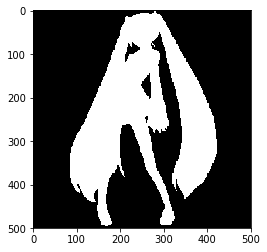

In [57]:
miku = pd.read_csv("../data/miku")
miku = np.array(miku.values)

miku_grayscale = miku[:, 2]

miku_grayscale = miku_grayscale.reshape((500, 500))
miku_grayscale = miku_grayscale.transpose()

image = Image.fromarray(miku_grayscale*255)
print(image.size)
imshow(image)
# image.show()

# 二.Decision Tree

# 三.Bagging

# 四.Boosting

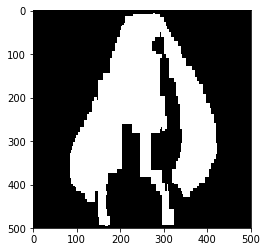

In [63]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10)

miku_data = miku[:, 0:2]
miku_target = miku[:, 2]

clf1.fit(miku_data, miku_target)

predict1 = clf1.predict(miku_data)
predict1 = predict1.reshape((500, 500))
predict1 = predict1.transpose()

image_pre1 = Image.fromarray(predict1*255)
# image_pre.show()
imshow(image_pre1)

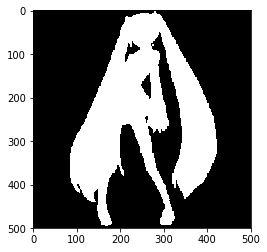

In [64]:
clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
clf2.fit(miku_data, miku_target)
predict2 = clf2.predict(miku_data)
predict2 = predict2.reshape((500, 500))
predict2 = predict2.transpose()
image_pre2 = Image.fromarray(predict2*255)
imshow(image_pre2)

# 五.GBDT

# 六.XGBoost